# Stitching WAXS images for multi-samples


--> V2: Dev March 20, 2018 adding options in func: Correct_Overlap_Images_Intensities
       
       New Options: do_smooth, pixel_start_smooth, pixel_stop_smooth

### SMI OLOG

SMI Olog (https://logbook.nsls2.bnl.gov/12-ID/)

For phi_spcaing = 6:
    overlap_width= 29, badpixel_width = 10
    
For phi_spcaing = 5:
    overlap_width= 58, badpixel_width = 10

In [308]:
%matplotlib notebook
from pySMI.smi_libs import *
from pySMI.smi_package import *
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams.update({ 'image.origin': 'lower'   })
plt.rcParams.update({ 'image.interpolation': 'none'   })

from databroker import Broker
db = Broker.named('smi')

In [309]:
%run ~/pySMI/pySMI/Stitching.py
%run ~/pySMI/pySMI/smi_generic_functions.py

# Setup all the parameters here

In [500]:
beam_x = 98.0 #97.0 for 2.4 keV; 98 for 16 keV
beam_y = 1316.0   #1475 - 159

energy = 16.0 #16.0 keV

start_angle = 5.0 #in degree, we will change according to data 
phi_spacing= 6.6  #previously 4 deg



In [501]:
wavelength_A =12.39842/energy
sam_det = 0.275 #in meters
dq = 4*np.pi/wavelength_A  * (172/1e6/sam_det)
print( wavelength_A )
calibration = CalibrationGonio(wavelength_A= wavelength_A) # 20.0 keV
calibration.set_image_size(195, height=1475) # Pilatus300kW vertical
#calibration.set_image_size(1475, height=195) # Pilatus300kW horizontal
calibration.set_pixel_size(pixel_size_um=172.0)
calibration.set_beam_position(beam_x,  beam_y )
calibration.set_distance( sam_det )
calibration.set_angles(det_phi_g=0., det_theta_g=0., )
print('ratio Dw = {:.3f}'.format(calibration.get_ratioDw()))
mask_dir = '/GPFS/xf12id1/analysis/commissioning/masks/'
mask = Mask(mask_dir+'Pilatus300kWh_main_gaps-mask.png')
#mask.load('./Pilatus300kWh_current-mask.png')
mask.load(mask_dir+'Pilatus300kWh_current-mask.png')

0.77490125
ratio Dw = 8.199


# Define Cycle &proposal_id here

In [312]:
CYCLE='2018_1'
proposal_id =  '302845'
username = 'Francisco'



In [313]:
inDir = '/GPFS/xf12id1/data/300KW/images/users/%s/'%proposal_id
print(  inDir )

/GPFS/xf12id1/data/300KW/images/users/302845/


In [314]:
#fp = get_base_all_filenames(inDir,base_filename_cut_length=-12-3 )
fp = get_base_all_filenames(inDir,base_filename_cut_length=-12-3 )
print('We found %s samples in %s folder.' %(len( list( fp.keys() ) ), inDir ) )

We found 111 samples in /GPFS/xf12id1/data/300KW/images/users/302845/ folder.


In [315]:
list(fp.keys())

['test_test_',
 'hanyu_2_hard_0.4deg_waxs_',
 'hanyu_2_hard_0.2deg_waxs_',
 'hanyu_2_hard_0.1deg_waxs_',
 'hanyu_1_hard_0.4deg_waxs_',
 'hanyu_1_hard_0.2deg_waxs_',
 'hanyu_1_hard_0.1deg_waxs_',
 'PDCBT_hard_0.4deg_waxs_',
 'PDCBT_hard_0.2deg_waxs_',
 'PDCBT_hard_0.1deg_waxs_',
 'PDCBT_ITIC_hard_0.4deg_waxs_',
 'PDCBT_ITIC_hard_0.2deg_waxs_',
 'PDCBT_ITIC_hard_0.1deg_waxs_',
 'PDCBT_ITIC_ASSQ_unannealed_0.52deg_1s_2482eV_waxs_',
 'PDCBT_ITIC_ASSQ_unannealed_0.52deg_1s_2476eV_waxs_',
 'PDCBT_ITIC_ASSQ_unannealed_0.52deg_1s_2470eV_waxs_',
 'PDCBT_ITIC_ASSQ_noanneal__hard_0.4deg_waxs_',
 'PDCBT_ITIC_ASSQ_noanneal__hard_0.2deg_waxs_',
 'PDCBT_ITIC_ASSQ_noanneal__hard_0.1deg_waxs_',
 'PDCBT_ITIC_ASSQ_hard_0.4deg_waxs_',
 'PDCBT_ITIC_ASSQ_hard_0.2deg_waxs_',
 'PDCBT_ITIC_ASSQ_hard_0.1deg_waxs_',
 'PDCBT_ITIC_ASSQ_3k_set2_5per_hard_0.4deg_waxs_',
 'PDCBT_ITIC_ASSQ_3k_set2_5per_hard_0.2deg_waxs_',
 'PDCBT_ITIC_ASSQ_3k_set2_5per_hard_0.1deg_waxs_',
 'PDCBT_ITIC_ASSQ_3k_set2_5per_0.52deg_1s_2482

# Data acquisition pattern

### class one

* three X-line (x1,x2,x3, xN)
* each X-line, have 250 y points  --> totally N*250 points
* for each point, do a arc scan from 4 to 28 with step size as 6 



### class two

 
* three X-line (x1,x2,x3, xN)
* each X-line, have 250 y points  --> totally N*250 points
* for each point, do one waxs at a particular angle 
* Repeat the above steps for different waxs angle from 4 to 28 with step as 6

Due to motor problem, this type data either save with one sample name or multi filename with angle

for multifiles, the first N (e.g., 251 ) for one angle, the next N for next bigger angle, and so on

# Create ResDir Here

In [316]:

username = 'Francisco'

In [317]:
ResDir0 = os.path.join('/GPFS/xf12id1/analysis/2018_1/', proposal_id, 'Results/%s/'%username)
os.makedirs(ResDir0, exist_ok=True)
print('Results from this analysis will be stashed in the directory %s' % ResDir0)

Results from this analysis will be stashed in the directory /GPFS/xf12id1/analysis/2018_1/302845/Results/Francisco/


In [319]:
for k in list(fp.keys()):    
    print(k, len(fp[k]))

test_test_ 2
hanyu_2_hard_0.4deg_waxs_ 7
hanyu_2_hard_0.2deg_waxs_ 7
hanyu_2_hard_0.1deg_waxs_ 7
hanyu_1_hard_0.4deg_waxs_ 7
hanyu_1_hard_0.2deg_waxs_ 7
hanyu_1_hard_0.1deg_waxs_ 7
PDCBT_hard_0.4deg_waxs_ 7
PDCBT_hard_0.2deg_waxs_ 7
PDCBT_hard_0.1deg_waxs_ 7
PDCBT_ITIC_hard_0.4deg_waxs_ 7
PDCBT_ITIC_hard_0.2deg_waxs_ 7
PDCBT_ITIC_hard_0.1deg_waxs_ 7
PDCBT_ITIC_ASSQ_unannealed_0.52deg_1s_2482eV_waxs_ 13
PDCBT_ITIC_ASSQ_unannealed_0.52deg_1s_2476eV_waxs_ 13
PDCBT_ITIC_ASSQ_unannealed_0.52deg_1s_2470eV_waxs_ 13
PDCBT_ITIC_ASSQ_noanneal__hard_0.4deg_waxs_ 7
PDCBT_ITIC_ASSQ_noanneal__hard_0.2deg_waxs_ 7
PDCBT_ITIC_ASSQ_noanneal__hard_0.1deg_waxs_ 7
PDCBT_ITIC_ASSQ_hard_0.4deg_waxs_ 7
PDCBT_ITIC_ASSQ_hard_0.2deg_waxs_ 7
PDCBT_ITIC_ASSQ_hard_0.1deg_waxs_ 7
PDCBT_ITIC_ASSQ_3k_set2_5per_hard_0.4deg_waxs_ 7
PDCBT_ITIC_ASSQ_3k_set2_5per_hard_0.2deg_waxs_ 7
PDCBT_ITIC_ASSQ_3k_set2_5per_hard_0.1deg_waxs_ 7
PDCBT_ITIC_ASSQ_3k_set2_5per_0.52deg_1s_2482eV_waxs_ 13
PDCBT_ITIC_ASSQ_3k_set2_5per_0.52deg_

# Check first N images for one angle

In [469]:
sam = 'PDCBT_ITIC_0.52deg_2476eV_waxs_'


infiles = sorted( fp[sam] )


In [470]:
print(infiles, len(infiles))

['/GPFS/xf12id1/data/300KW/images/users/302845/PDCBT_ITIC_0.52deg_2476eV_waxs_000001_WAXS.tif', '/GPFS/xf12id1/data/300KW/images/users/302845/PDCBT_ITIC_0.52deg_2476eV_waxs_000002_WAXS.tif', '/GPFS/xf12id1/data/300KW/images/users/302845/PDCBT_ITIC_0.52deg_2476eV_waxs_000003_WAXS.tif', '/GPFS/xf12id1/data/300KW/images/users/302845/PDCBT_ITIC_0.52deg_2476eV_waxs_000004_WAXS.tif', '/GPFS/xf12id1/data/300KW/images/users/302845/PDCBT_ITIC_0.52deg_2476eV_waxs_000005_WAXS.tif', '/GPFS/xf12id1/data/300KW/images/users/302845/PDCBT_ITIC_0.52deg_2476eV_waxs_000006_WAXS.tif', '/GPFS/xf12id1/data/300KW/images/users/302845/PDCBT_ITIC_0.52deg_2476eV_waxs_000007_WAXS.tif', '/GPFS/xf12id1/data/300KW/images/users/302845/PDCBT_ITIC_0.52deg_2476eV_waxs_000008_WAXS.tif', '/GPFS/xf12id1/data/300KW/images/users/302845/PDCBT_ITIC_0.52deg_2476eV_waxs_000009_WAXS.tif', '/GPFS/xf12id1/data/300KW/images/users/302845/PDCBT_ITIC_0.52deg_2476eV_waxs_000010_WAXS.tif', '/GPFS/xf12id1/data/300KW/images/users/302845/PDC

In [489]:
vmin = 50
vmax = 3000

In [490]:
Ns = 0#5
Ni = 13

<IPython.core.display.Javascript object>


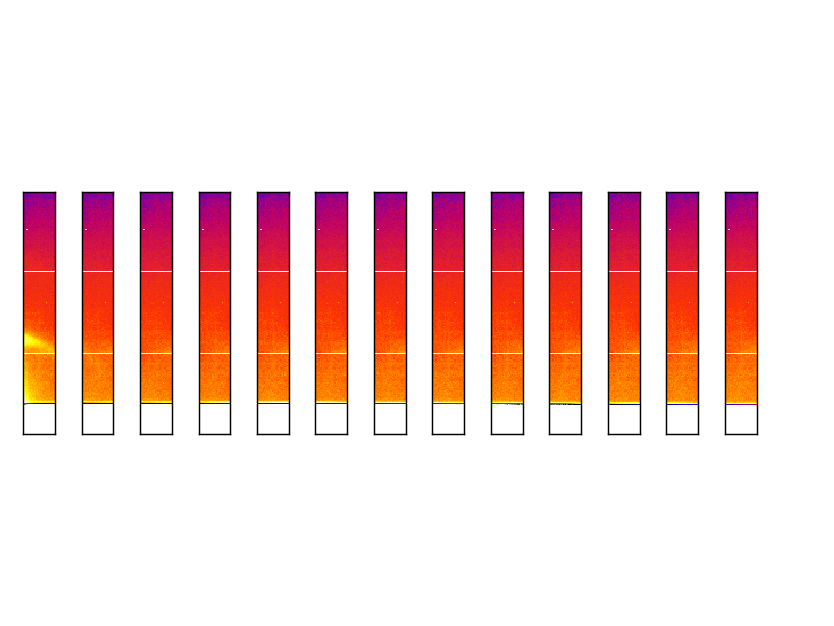

/GPFS/xf12id1/data/300KW/images/users/302845/PDCBT_ITIC_0.52deg_2476eV_waxs_000001_WAXS.tif
/GPFS/xf12id1/data/300KW/images/users/302845/PDCBT_ITIC_0.52deg_2476eV_waxs_000002_WAXS.tif
/GPFS/xf12id1/data/300KW/images/users/302845/PDCBT_ITIC_0.52deg_2476eV_waxs_000003_WAXS.tif
/GPFS/xf12id1/data/300KW/images/users/302845/PDCBT_ITIC_0.52deg_2476eV_waxs_000004_WAXS.tif
/GPFS/xf12id1/data/300KW/images/users/302845/PDCBT_ITIC_0.52deg_2476eV_waxs_000005_WAXS.tif
/GPFS/xf12id1/data/300KW/images/users/302845/PDCBT_ITIC_0.52deg_2476eV_waxs_000006_WAXS.tif
/GPFS/xf12id1/data/300KW/images/users/302845/PDCBT_ITIC_0.52deg_2476eV_waxs_000007_WAXS.tif
/GPFS/xf12id1/data/300KW/images/users/302845/PDCBT_ITIC_0.52deg_2476eV_waxs_000008_WAXS.tif
/GPFS/xf12id1/data/300KW/images/users/302845/PDCBT_ITIC_0.52deg_2476eV_waxs_000009_WAXS.tif
/GPFS/xf12id1/data/300KW/images/users/302845/PDCBT_ITIC_0.52deg_2476eV_waxs_000010_WAXS.tif
/GPFS/xf12id1/data/300KW/images/users/302845/PDCBT_ITIC_0.52deg_2476eV_waxs_0000

In [491]:
fig = plt.figure()# figsize=[2,8]) 
for i in range(Ns, Ns + Ni ):
    #print(i)
    ax = fig.add_subplot(1, Ni+1, i+1 - Ns)
    #d = process.load(  infiles[i]  )    
    d = np.array(  PIL.Image.open(infiles[i]).convert('I') )
    print( infiles[i] )
    #vmin=  max(1, d.mean() - d.std()*sca), vmax= d.mean() + d.std()*sca,
    sca= 1
    show_img( (d).T, logs = True, show_colorbar= False,show_ticks =False,
             ax= [fig, ax], cmap = cmap_vge_hdr, 
             vmin= vmin, vmax= vmax, image_name='',              
            aspect=1, save=False, path=ResDir0)
#fig.savefig(ResDir + k+'raw_image_%s-%s.png'%(Ns, Ns+Ni))

In [492]:
for k in list(fp.keys()):    
    print(k , len(fp[k]))

test_test_ 2
hanyu_2_hard_0.4deg_waxs_ 7
hanyu_2_hard_0.2deg_waxs_ 7
hanyu_2_hard_0.1deg_waxs_ 7
hanyu_1_hard_0.4deg_waxs_ 7
hanyu_1_hard_0.2deg_waxs_ 7
hanyu_1_hard_0.1deg_waxs_ 7
PDCBT_hard_0.4deg_waxs_ 7
PDCBT_hard_0.2deg_waxs_ 7
PDCBT_hard_0.1deg_waxs_ 7
PDCBT_ITIC_hard_0.4deg_waxs_ 7
PDCBT_ITIC_hard_0.2deg_waxs_ 7
PDCBT_ITIC_hard_0.1deg_waxs_ 7
PDCBT_ITIC_ASSQ_unannealed_0.52deg_1s_2482eV_waxs_ 13
PDCBT_ITIC_ASSQ_unannealed_0.52deg_1s_2476eV_waxs_ 13
PDCBT_ITIC_ASSQ_unannealed_0.52deg_1s_2470eV_waxs_ 13
PDCBT_ITIC_ASSQ_noanneal__hard_0.4deg_waxs_ 7
PDCBT_ITIC_ASSQ_noanneal__hard_0.2deg_waxs_ 7
PDCBT_ITIC_ASSQ_noanneal__hard_0.1deg_waxs_ 7
PDCBT_ITIC_ASSQ_hard_0.4deg_waxs_ 7
PDCBT_ITIC_ASSQ_hard_0.2deg_waxs_ 7
PDCBT_ITIC_ASSQ_hard_0.1deg_waxs_ 7
PDCBT_ITIC_ASSQ_3k_set2_5per_hard_0.4deg_waxs_ 7
PDCBT_ITIC_ASSQ_3k_set2_5per_hard_0.2deg_waxs_ 7
PDCBT_ITIC_ASSQ_3k_set2_5per_hard_0.1deg_waxs_ 7
PDCBT_ITIC_ASSQ_3k_set2_5per_0.52deg_1s_2482eV_waxs_ 13
PDCBT_ITIC_ASSQ_3k_set2_5per_0.52deg_

In [493]:
#waxs_stitch_list = [    ]

In [250]:
#for k in list(fp.keys()):
#    if 'PDCBT' in k:
#        waxs_stitch_list.append(k)

In [251]:
#waxs_stitch_list

In [124]:
#waxs_good_list =[ 'PCBM600arc_10_88_th64E2472_2472eV_offset05_' ]
#waxs_good_list =[ 'PCBM600_arc_88_10_th64E2400_' ]



# Stitching Non-Snake Patterns

In [506]:
sam =   'PDCBT_ITIC_hard_0.2deg_waxs_'

infiles = sorted( fp[sam] )
print(sam)

PDCBT_ITIC_hard_0.2deg_waxs_


In [507]:
len(infiles)

7

In [508]:
overlap_width = get_pixel_overlap( phi_spacing )
print( overlap_width )

12


In [520]:

do_smooth= False #True #False #False #True
pixel_start_smooth = 210
pixel_stop_smooth =None
cmap = cmap_vge_hdr



In [522]:
waxs_good_list =[

 'hanyu_2_hard_0.4deg_waxs_',
 'hanyu_2_hard_0.2deg_waxs_',
 'hanyu_2_hard_0.1deg_waxs_',
 'hanyu_1_hard_0.4deg_waxs_',
 'hanyu_1_hard_0.2deg_waxs_',
 'hanyu_1_hard_0.1deg_waxs_'
]

In [257]:
waxs_good_list =[ 'PDCBT_0.52deg_2476eV_waxs_']



hanyu_2_hard_0.4deg_waxs_
Results from this analysis will be stashed in the directory /GPFS/xf12id1/analysis/2018_1/302845/Results/Francisco/hanyu_2_hard_0.4deg_waxs_/
Stitching Pos: ...1
------> files to be stitched are: 
['hanyu_2_hard_0.4deg_waxs_000001_WAXS.tif'
 'hanyu_2_hard_0.4deg_waxs_000002_WAXS.tif'
 'hanyu_2_hard_0.4deg_waxs_000003_WAXS.tif'
 'hanyu_2_hard_0.4deg_waxs_000004_WAXS.tif'
 'hanyu_2_hard_0.4deg_waxs_000005_WAXS.tif'
 'hanyu_2_hard_0.4deg_waxs_000006_WAXS.tif'
 'hanyu_2_hard_0.4deg_waxs_000007_WAXS.tif'].
The rotated angles are: [ -5.         -11.33333333 -17.66666667 -24.         -30.33333333
 -36.66666667 -43.        ].


<IPython.core.display.Javascript object>


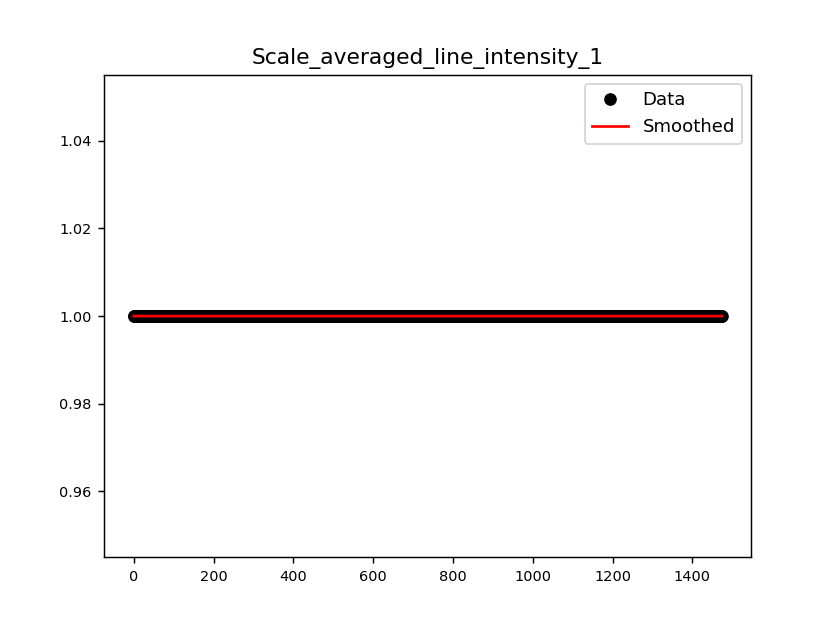

-5.0 -43.0 [ 0.20147678  6.32476632 -0.79744098  5.1643119 ]
The data is save to: /GPFS/xf12id1/analysis/2018_1/302845/Results/Francisco/hanyu_2_hard_0.4deg_waxs_/hanyu_2_hard_0.4deg_waxs_Qmap_pos=1.tif.


/home/yuzhang/pySMI/pySMI/Stitching.py:281: RuntimeWarning: invalid value encountered in true_divide
  Intensity_map = np.nan_to_num( Intensity_map/count_map )


<IPython.core.display.Javascript object>


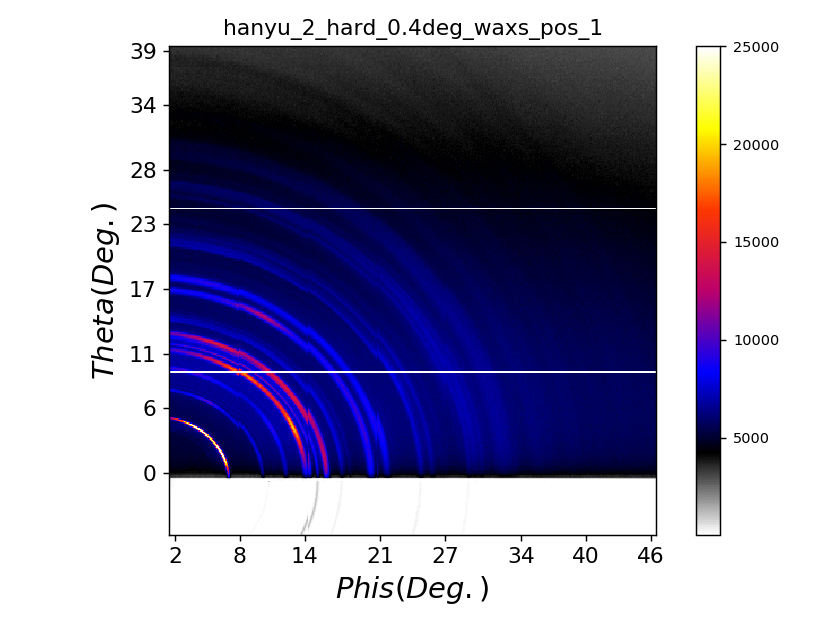

<IPython.core.display.Javascript object>


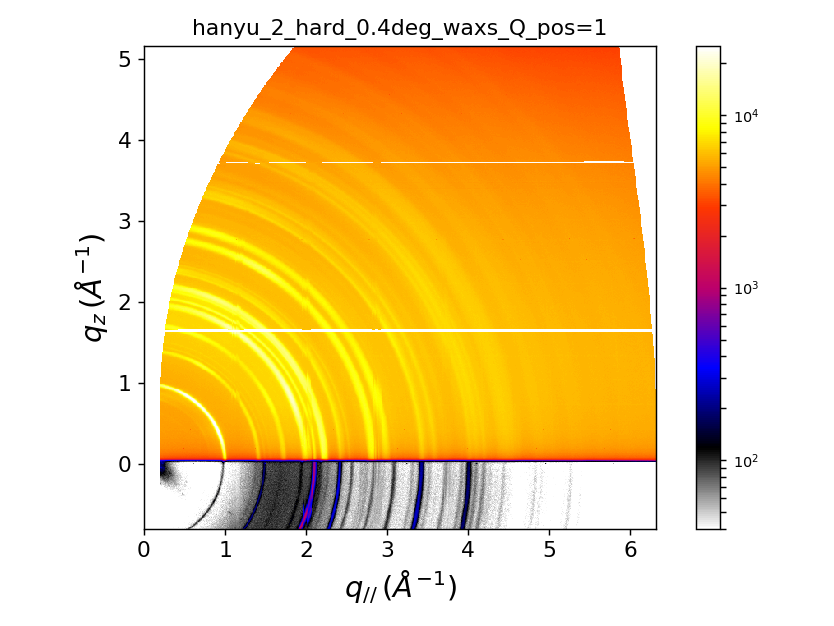

/opt/conda_envs/analysis/lib/python3.6/site-packages/matplotlib/colorbar.py:821: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  y[self._inside] = norm(yi)


hanyu_2_hard_0.2deg_waxs_
Results from this analysis will be stashed in the directory /GPFS/xf12id1/analysis/2018_1/302845/Results/Francisco/hanyu_2_hard_0.2deg_waxs_/
Stitching Pos: ...1
------> files to be stitched are: 
['hanyu_2_hard_0.2deg_waxs_000001_WAXS.tif'
 'hanyu_2_hard_0.2deg_waxs_000002_WAXS.tif'
 'hanyu_2_hard_0.2deg_waxs_000003_WAXS.tif'
 'hanyu_2_hard_0.2deg_waxs_000004_WAXS.tif'
 'hanyu_2_hard_0.2deg_waxs_000005_WAXS.tif'
 'hanyu_2_hard_0.2deg_waxs_000006_WAXS.tif'
 'hanyu_2_hard_0.2deg_waxs_000007_WAXS.tif'].
The rotated angles are: [ -5.         -11.33333333 -17.66666667 -24.         -30.33333333
 -36.66666667 -43.        ].


<IPython.core.display.Javascript object>


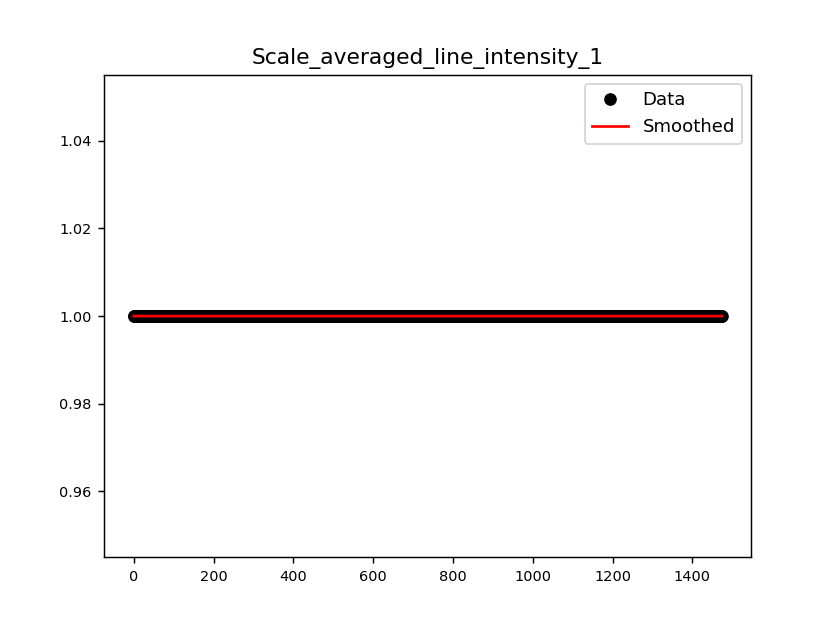

-5.0 -43.0 [ 0.20147678  6.32476632 -0.79744098  5.1643119 ]
The data is save to: /GPFS/xf12id1/analysis/2018_1/302845/Results/Francisco/hanyu_2_hard_0.2deg_waxs_/hanyu_2_hard_0.2deg_waxs_Qmap_pos=1.tif.


<IPython.core.display.Javascript object>


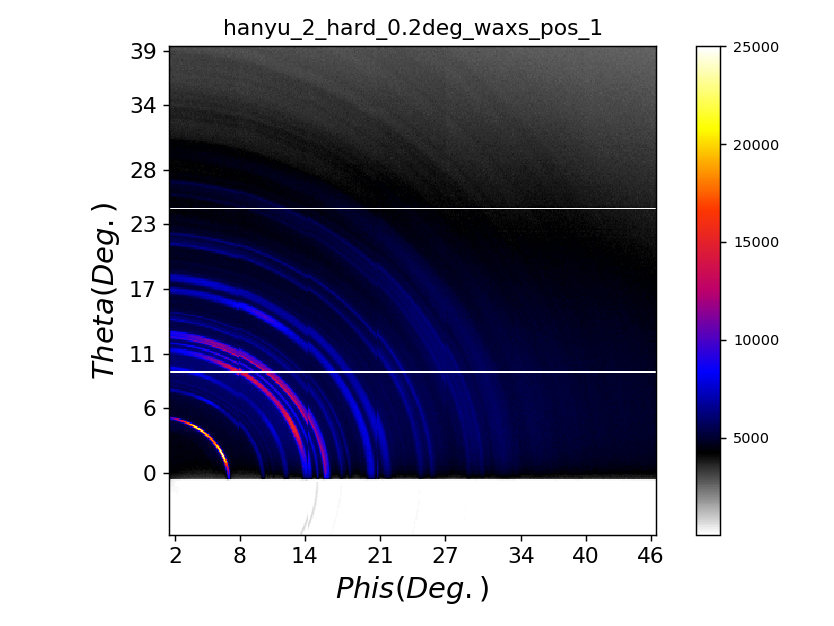

<IPython.core.display.Javascript object>


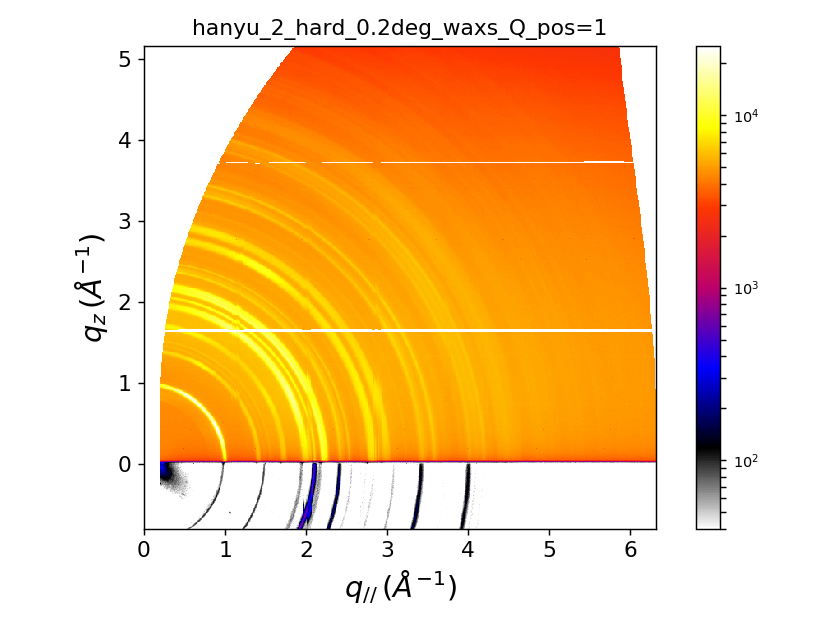

hanyu_2_hard_0.1deg_waxs_
Results from this analysis will be stashed in the directory /GPFS/xf12id1/analysis/2018_1/302845/Results/Francisco/hanyu_2_hard_0.1deg_waxs_/
Stitching Pos: ...1
------> files to be stitched are: 
['hanyu_2_hard_0.1deg_waxs_000001_WAXS.tif'
 'hanyu_2_hard_0.1deg_waxs_000002_WAXS.tif'
 'hanyu_2_hard_0.1deg_waxs_000003_WAXS.tif'
 'hanyu_2_hard_0.1deg_waxs_000004_WAXS.tif'
 'hanyu_2_hard_0.1deg_waxs_000005_WAXS.tif'
 'hanyu_2_hard_0.1deg_waxs_000006_WAXS.tif'
 'hanyu_2_hard_0.1deg_waxs_000007_WAXS.tif'].
The rotated angles are: [ -5.         -11.33333333 -17.66666667 -24.         -30.33333333
 -36.66666667 -43.        ].


<IPython.core.display.Javascript object>


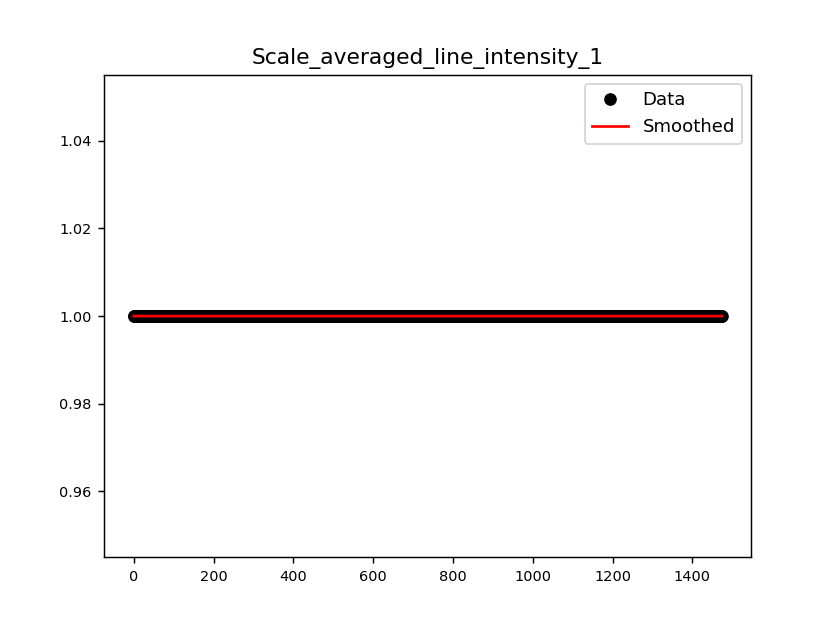

-5.0 -43.0 [ 0.20147678  6.32476632 -0.79744098  5.1643119 ]
The data is save to: /GPFS/xf12id1/analysis/2018_1/302845/Results/Francisco/hanyu_2_hard_0.1deg_waxs_/hanyu_2_hard_0.1deg_waxs_Qmap_pos=1.tif.


<IPython.core.display.Javascript object>


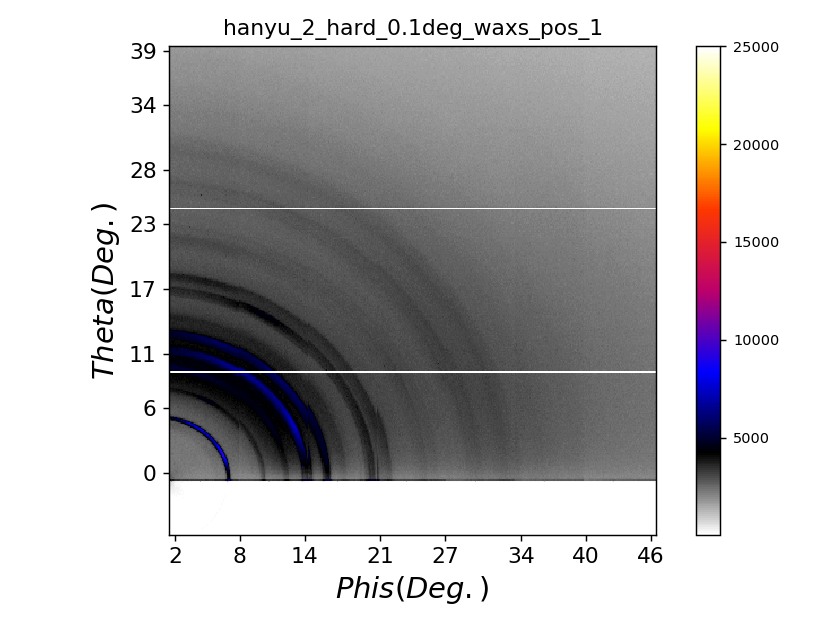

<IPython.core.display.Javascript object>


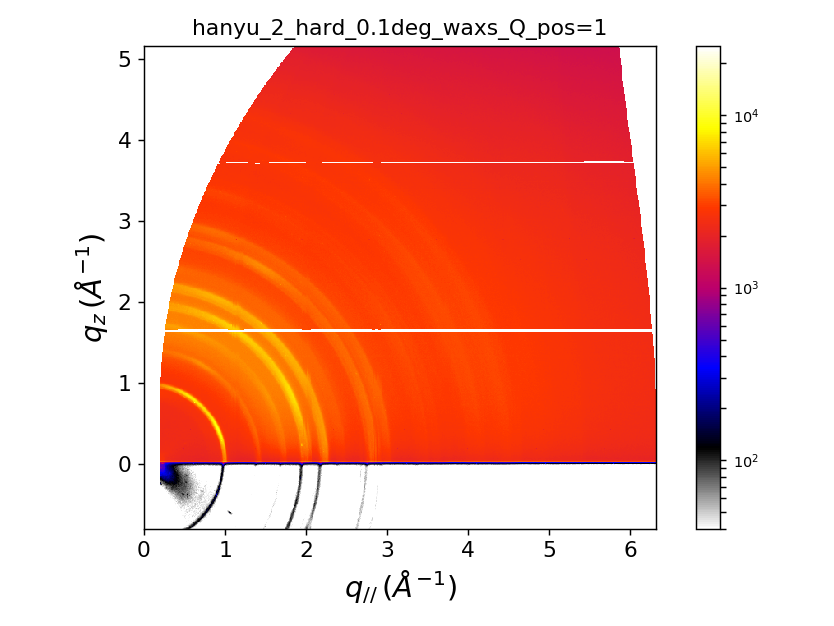

hanyu_1_hard_0.4deg_waxs_
Results from this analysis will be stashed in the directory /GPFS/xf12id1/analysis/2018_1/302845/Results/Francisco/hanyu_1_hard_0.4deg_waxs_/
Stitching Pos: ...1
------> files to be stitched are: 
['hanyu_1_hard_0.4deg_waxs_000001_WAXS.tif'
 'hanyu_1_hard_0.4deg_waxs_000002_WAXS.tif'
 'hanyu_1_hard_0.4deg_waxs_000003_WAXS.tif'
 'hanyu_1_hard_0.4deg_waxs_000004_WAXS.tif'
 'hanyu_1_hard_0.4deg_waxs_000005_WAXS.tif'
 'hanyu_1_hard_0.4deg_waxs_000006_WAXS.tif'
 'hanyu_1_hard_0.4deg_waxs_000007_WAXS.tif'].
The rotated angles are: [ -5.         -11.33333333 -17.66666667 -24.         -30.33333333
 -36.66666667 -43.        ].


<IPython.core.display.Javascript object>


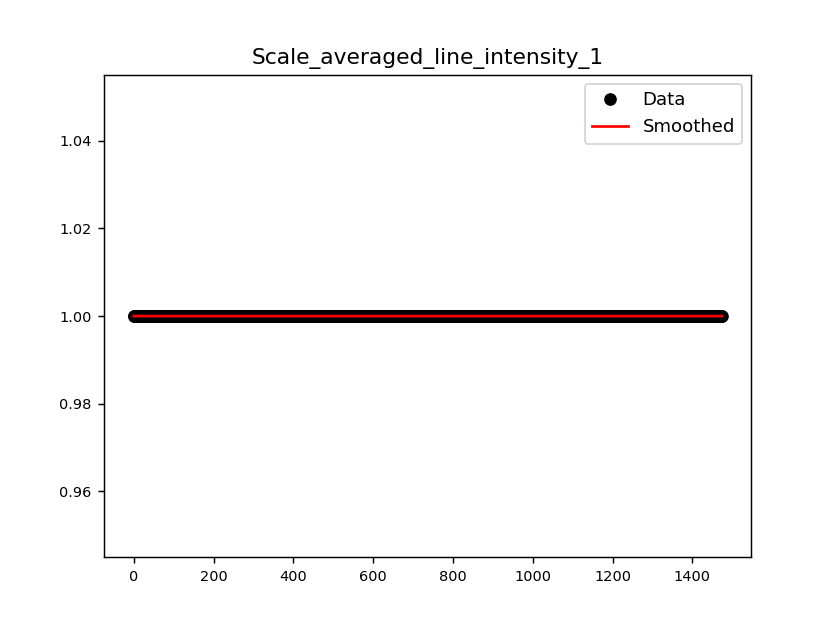

-5.0 -43.0 [ 0.20147678  6.32476632 -0.79744098  5.1643119 ]
The data is save to: /GPFS/xf12id1/analysis/2018_1/302845/Results/Francisco/hanyu_1_hard_0.4deg_waxs_/hanyu_1_hard_0.4deg_waxs_Qmap_pos=1.tif.


<IPython.core.display.Javascript object>


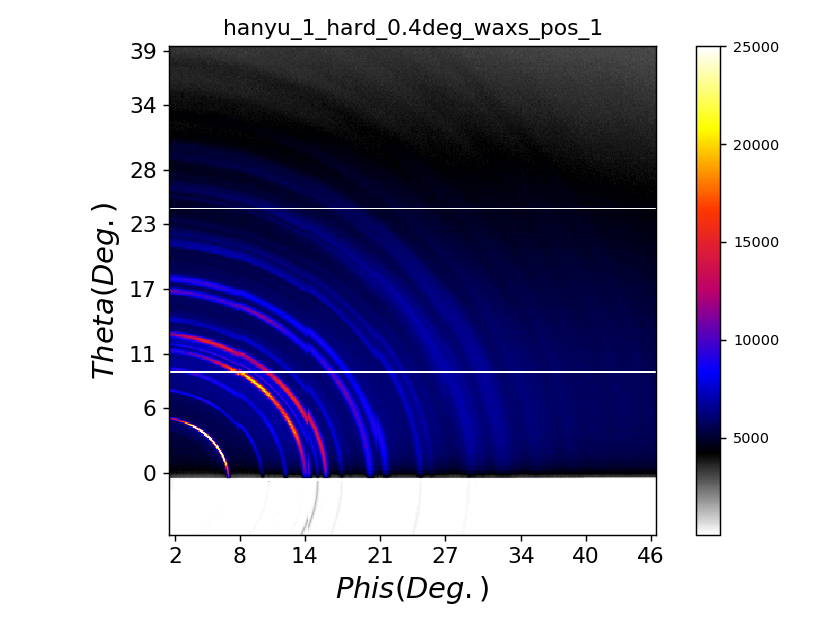

<IPython.core.display.Javascript object>


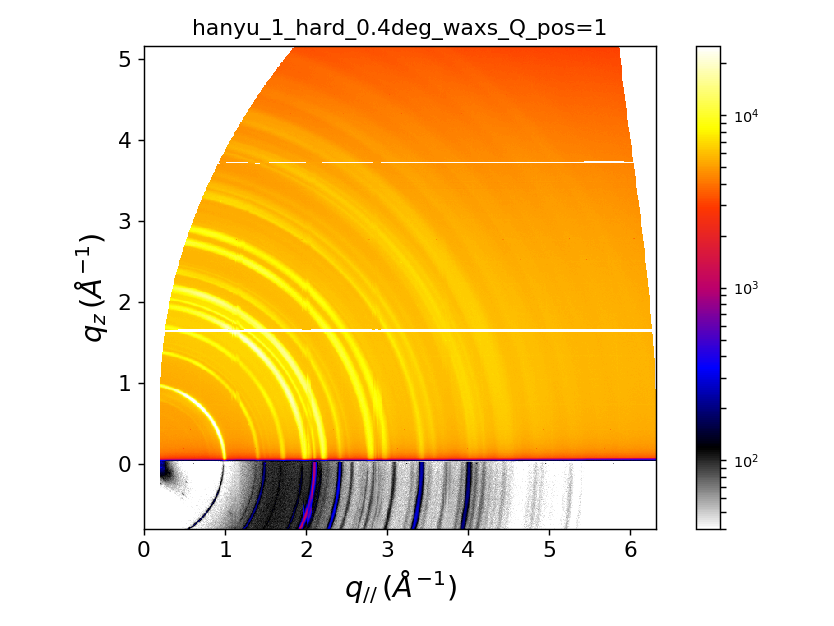

hanyu_1_hard_0.2deg_waxs_
Results from this analysis will be stashed in the directory /GPFS/xf12id1/analysis/2018_1/302845/Results/Francisco/hanyu_1_hard_0.2deg_waxs_/
Stitching Pos: ...1
------> files to be stitched are: 
['hanyu_1_hard_0.2deg_waxs_000001_WAXS.tif'
 'hanyu_1_hard_0.2deg_waxs_000002_WAXS.tif'
 'hanyu_1_hard_0.2deg_waxs_000003_WAXS.tif'
 'hanyu_1_hard_0.2deg_waxs_000004_WAXS.tif'
 'hanyu_1_hard_0.2deg_waxs_000005_WAXS.tif'
 'hanyu_1_hard_0.2deg_waxs_000006_WAXS.tif'
 'hanyu_1_hard_0.2deg_waxs_000007_WAXS.tif'].
The rotated angles are: [ -5.         -11.33333333 -17.66666667 -24.         -30.33333333
 -36.66666667 -43.        ].


<IPython.core.display.Javascript object>


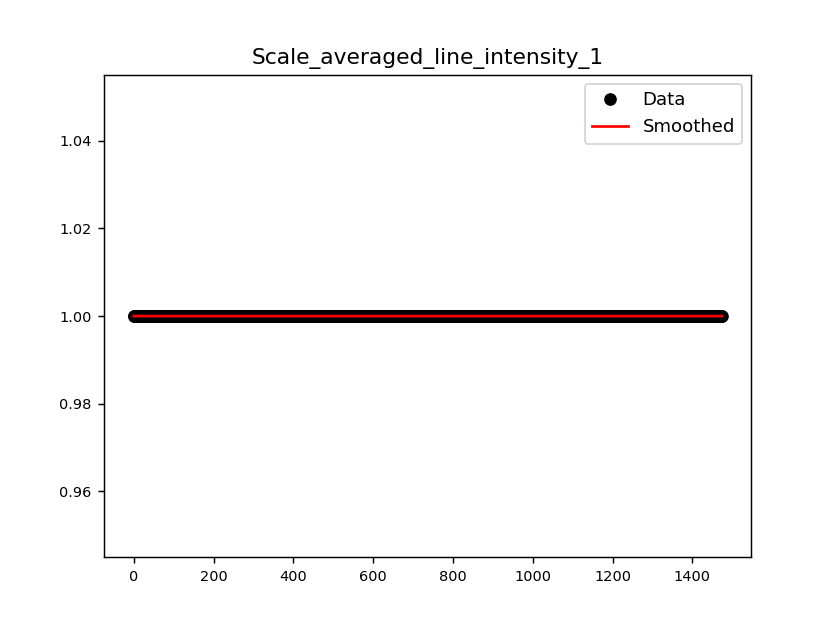

-5.0 -43.0 [ 0.20147678  6.32476632 -0.79744098  5.1643119 ]
The data is save to: /GPFS/xf12id1/analysis/2018_1/302845/Results/Francisco/hanyu_1_hard_0.2deg_waxs_/hanyu_1_hard_0.2deg_waxs_Qmap_pos=1.tif.


<IPython.core.display.Javascript object>


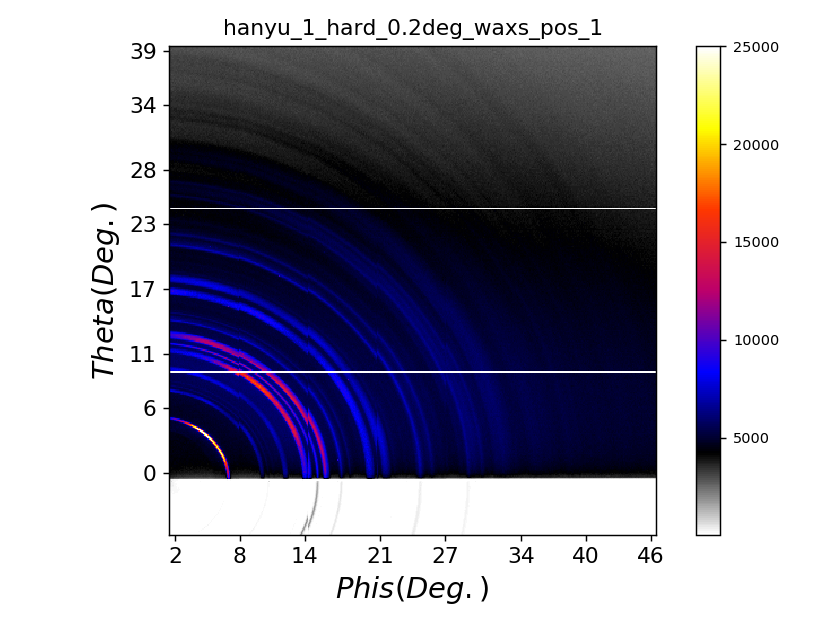

<IPython.core.display.Javascript object>


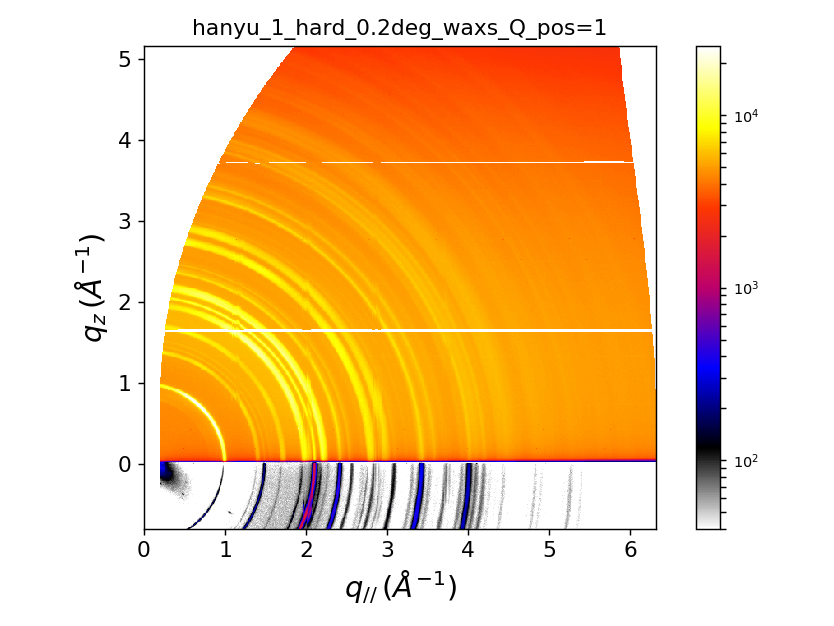

hanyu_1_hard_0.1deg_waxs_
Results from this analysis will be stashed in the directory /GPFS/xf12id1/analysis/2018_1/302845/Results/Francisco/hanyu_1_hard_0.1deg_waxs_/
Stitching Pos: ...1
------> files to be stitched are: 
['hanyu_1_hard_0.1deg_waxs_000001_WAXS.tif'
 'hanyu_1_hard_0.1deg_waxs_000002_WAXS.tif'
 'hanyu_1_hard_0.1deg_waxs_000003_WAXS.tif'
 'hanyu_1_hard_0.1deg_waxs_000004_WAXS.tif'
 'hanyu_1_hard_0.1deg_waxs_000005_WAXS.tif'
 'hanyu_1_hard_0.1deg_waxs_000006_WAXS.tif'
 'hanyu_1_hard_0.1deg_waxs_000007_WAXS.tif'].
The rotated angles are: [ -5.         -11.33333333 -17.66666667 -24.         -30.33333333
 -36.66666667 -43.        ].


<IPython.core.display.Javascript object>


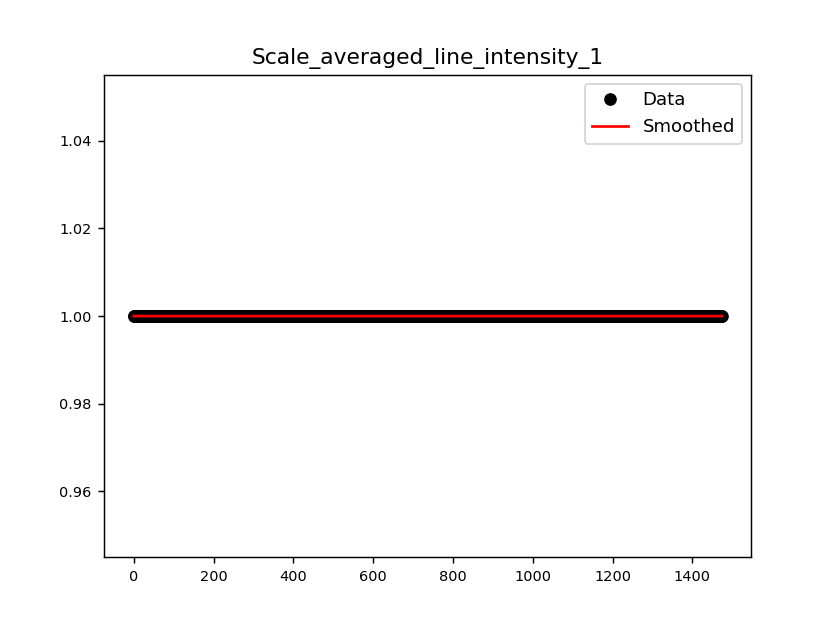

-5.0 -43.0 [ 0.20147678  6.32476632 -0.79744098  5.1643119 ]
The data is save to: /GPFS/xf12id1/analysis/2018_1/302845/Results/Francisco/hanyu_1_hard_0.1deg_waxs_/hanyu_1_hard_0.1deg_waxs_Qmap_pos=1.tif.


<IPython.core.display.Javascript object>


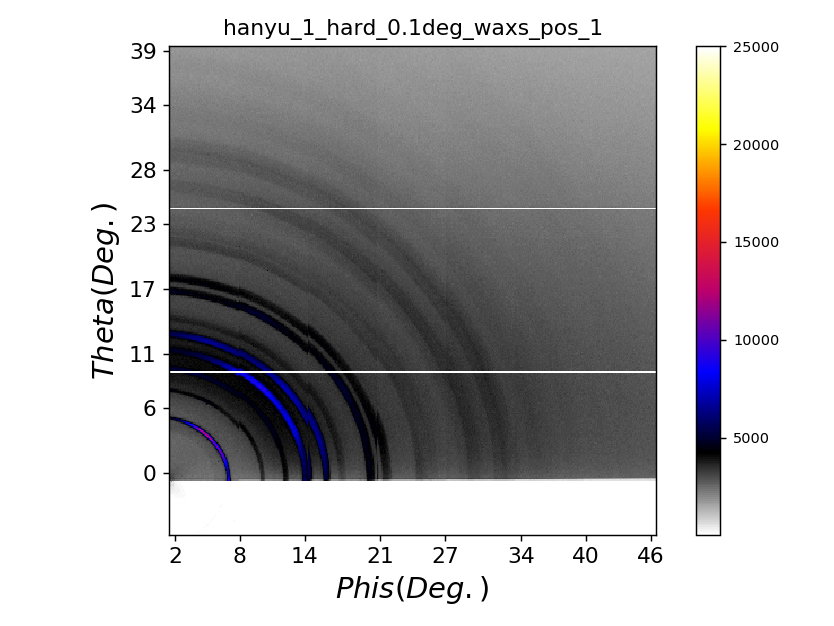

<IPython.core.display.Javascript object>


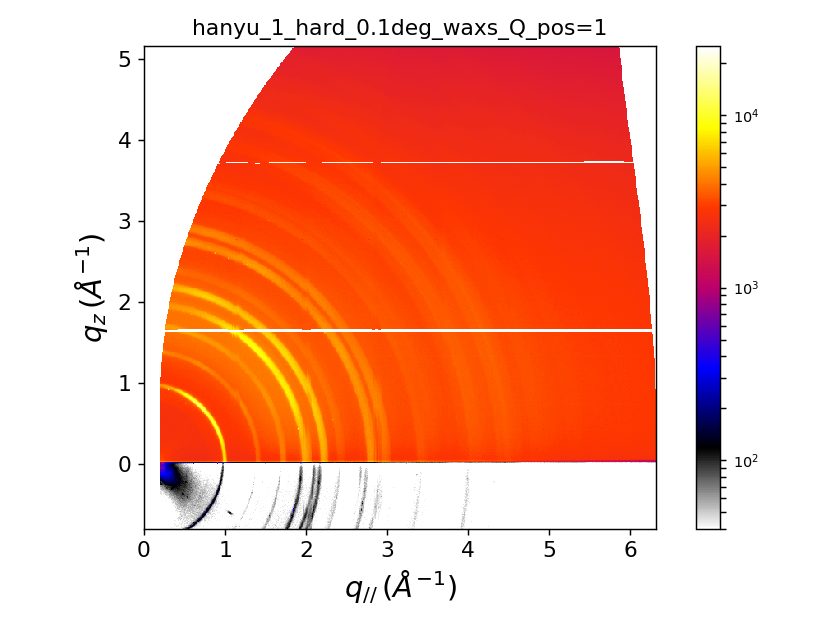

In [523]:
for sam in waxs_good_list:
    infiles = sorted( fp[sam] )
    print(sam)
    
    Nstart  = 0# starting point of the stitiching
    Nend  =   1# ending point of the stitiching

    #there will be a bad point due to beam dump, bad filename from ..to T80t_x5.9_000435_WAXS.tif


    ResDir = os.path.join( ResDir0, sam +'/' )
    os.makedirs(ResDir, exist_ok=True)
    print('Results from this analysis will be stashed in the directory %s' % ResDir)

    
    start_angle = 5
    phi_spacing = 38/6
    Ni = 7 # number of frames to stitching
    
    
    
    vmin= 40
    vmax= 25e3

    w= 1001
    p= 3
    #cmap = 'gray' #cmap_vge_hdr


    infiles = sorted( fp[sam] )
    for pos in range( Nstart, Nend, 1 ):
        print("Stitching Pos: ...%s"%(pos+1))   
        if pos%2:
            #fsub = infiles[pos*Ni : (pos+1)* Ni ][::-1]  #this code applies for sneak pattern
            fsub = infiles[pos*Ni : (pos+1)* Ni ] 
        else:
            fsub = infiles[pos*Ni : (pos+1)* Ni ]  #[::-1]     [::-1] for reverse filenames

        #print("------> filename is ranging from %06d to %06d."%( pos*Ni, (pos+1)* Ni -1  ))
        fsubs = np.array( [ np.array( fsub )[i].split('/')[-1] for i in range(len(fsub)) ]   )
        print("------> files to be stitched are: \n%s."%( fsubs ))
        #print( fsub)
        if pos ==Nstart:   
            phis = -start_angle - np.arange(0, Ni) * phi_spacing 
            print('The rotated angles are: %s.'%phis)


        data, dataM, scale,scale_smooth = Correct_Overlap_Images_Intensities( fsub, window_length=w, polyorder=p, 
                   overlap_width= overlap_width, badpixel_width = 10, do_smooth=do_smooth,
                    pixel_start_smooth =  pixel_start_smooth,pixel_stop_smooth = pixel_stop_smooth )                                                        
                                                                            
                                                                            
        check_overlap_scaling_factor( scale,scale_smooth, i=1, filename = ResDir + sam + 'smoothed_one_line_1.png', save= False )

        angzs, angze, angxs, angxe = [
            np.degrees( np.arctan2 ( (beam_y-data.shape[0]) * 172/1e6, sam_det ) ), 
            np.degrees( np.arctan2 ( ( beam_y ) * 172/1e6, sam_det ) ),
            abs(phis[0]) - 3.5, 
            abs(phis[ len(phis)-1]) + 3.5     ] 


        ytick = np.round( np.linspace(angzs, angze, 9 ), 0 )
        xtick = np.round( np.linspace(angxs, angxe, 8 ), 0 )
        axs =  np.linspace(angxs, angxe, data.shape[1] )
        azs =  np.linspace(angzs, angze, data.shape[0] )        

        qdata, xs, zs = stitch_WAXS_in_Qspace( dataM, phis, calibration, x='Qr',
                                  dx= 0, dy = 22, dz = 0,  dq= dq, mask=mask.data.T )

        save_array_to_tiff(  qdata, ResDir + sam + 'Qmap_pos=%s.tif'% (pos +1)  )
        np.savetxt(  ResDir + sam + 'Qmap_qr_cor_pos=%s.txt'%(pos+1),  xs )
        np.savetxt(  ResDir + sam + 'Qmap_qz_cor_pos=%s.txt'%(pos+1),  zs )

        #show angle space

        fig,ax=plt.subplots()
        show_img(data, logs = False,  ax=[fig,ax],  vmin=  vmin, vmax= vmax,
                 xlabel='$Phis (Deg.)$',  ylabel='$Theta (Deg.)$', 
                 cmap = cmap,  extent=[angxs, angxe, angzs, angze], aspect=1,  
                 image_name = sam+ 'pos_%s'%(pos+1), dpi=500, save=False, path=ResDir)
        ax.set_yticks( ytick )
        ax.set_xticks( xtick )
        fig.savefig( ResDir +  sam+ 'Angle_pos=%s.png'%(pos+1) )

        #show Q space

        show_img(qdata, logs = True,  vmin=  vmin, vmax= vmax,
             extent=[xs[0], xs[-1], zs[0],zs[-1]], xlabel='$q_{//} \, (\AA^{-1})$',  ylabel='$q_z \, (\AA^{-1})$', 
             cmap = cmap,   aspect=1,  image_name = sam + 'Q_pos=%s'%(pos+1), dpi=500, save=True, path=ResDir)





        #print( fsub )

